# MNIST  (@rafael magalhães)

In [102]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from sklearn import metrics

A MLP deve ser implementada de forma a utilizar uma arquitetura simples e ainda, assim, obter uma performance elevada. Ao final, __três modelos__ de rede devem ser implementados e comparados. Os detalhes de implementação devem ser justificados a cada questão e será dividido em 5 etapas:

1. Leitura, visualização e pré-processmaento do dataset
2. Conversao do array de predições Y
3. Definição da topologia da rede (camadas e neurônios)
4. Definir otimizador, função custo e modo de treinamento (batch, mini-batch, estocástico)
5. Treinamento e avaliação de resultados

![MNIST Example](https://github.com/cflavs/DeepLearning-DisciplinaUFPB/raw/75dadbf18b132f6537fd68abee8636f52fbe9b8f/MLP%20para%20Imagens/imgs/mninst.png)




# 1. Leitura visualização do dataset

Conforme exigido pelo problema, além de importar o dataset é importante obter informações sobre o conjunto bem como definir uma versão normalizada do mesmo.



N. de amostras (train):  60000
N. de amostras (test):  10000
Dimensão dos dados de entrada: 28 x 28
Dimensão dos dados de saída:  10




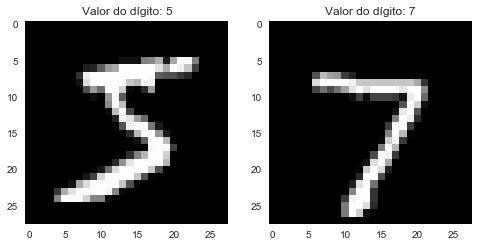

In [103]:
# Obtendo o dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Visualizando informações sobre as instâncias
print('\n')
print('N. de amostras (train): ', x_train.shape[0])
print('N. de amostras (test): ', x_test.shape[0])
print('Dimensão dos dados de entrada: {} x {}'.format(x_train.shape[1], x_train.shape[2]))
print('Dimensão dos dados de saída: ',len(np.unique(y_train)))
print('\n')

# Visualizar instâncias
plt.figure(figsize=[8,4])
# exemplo de dados de treinamento
plt.subplot(121)
plt.imshow(x_train[0], cmap=plt.get_cmap('gray'))
plt.title("Valor do dígito: {}".format(y_train[0]))
plt.grid(False)
# exemplo de dados de teste
plt.subplot(122)
plt.imshow(x_test[0], cmap=plt.get_cmap('gray'))
plt.title("Valor do dígito: {}".format(y_test[0]))
plt.grid(False)
plt.show()
print('\n')


# 2. Conversão e pré-processamento do Dataset

Para realizar o treinamento e efetiva utilização da rede é necessário redimensionar os dados de entrada e realizar eventuais pré-processamentos (neste caso uma normalização)


In [104]:
# Convertendo o formato de entrada de (28x28)[0-255] para o formato (1x748)(float)[0-1]
dimensao = x_train.shape[1]*x_train.shape[2]

# redimensionando
xin_train = x_train.reshape(x_train.shape[0], dimensao)
xin_test = x_test.reshape(x_test.shape[0], dimensao)
# convertendo para float devido a divisão
xin_train = xin_train.astype('float32')
xin_test = xin_test.astype('float32')
# normalizando os dados de entrada
xin_train /= 255
xin_test /= 255

# Convertendo o formato de saida de (1x1)[0-9] para o formato one-hot (1x10)float[0;1]
yout_train = to_categorical(y_train)
yout_test = to_categorical(y_test)

# Exibindo dados antes e depois do pré-processamento
print('\n')
print('Dados de entrada antes : ', x_train.shape[1:])
print('Dados de entrada depois: ', xin_train.shape[1])
print('')
print('Dados de saída antes : ', y_train[0].shape)
print('Dados de saída depois: ', yout_train[0].shape)
print('')
print('Exemplo de saída antes : ', y_train[0])
print('Exemplo de saída depois: ', yout_train[0])
print('\n')



Dados de entrada antes :  (28, 28)
Dados de entrada depois:  784

Dados de saída antes :  ()
Dados de saída depois:  (10,)

Exemplo de saída antes :  5
Exemplo de saída depois:  [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]




# 3. Definição da topologia da rede (camadas e neurônios)

Três redes serão definidas conforme solicitado no problema. Além disso uma delas terá funções de ativação alteradas e será empregado um esquema de regularização.

A função da camada de saída escolhida foi a softmax devido a intenção de reduzir as probabilidades de falhas por ambiguidades no processo de predição.


In [105]:
# Definição das três arquiteturas iniciais para treinamento das redes
# Baseado no site do repositório MNIST

# Rede 1 (completamente conectada, IN->300->100->out) relu-relu-softmax
model_1 = Sequential()
model_1.add(Dense(300, activation='relu', input_shape=(dimensao,)))
model_1.add(Dense(100, activation='relu'))
model_1.add(Dense(len(yout_train[0]), activation='softmax'))
print('\nRede 1: IN -> 300 (relu) -> 100 (relu) -> OUT (softmax)')

# Rede 2 (completamente concetada, IN->300->out) relu-softmax
model_2 = Sequential()
model_2.add(Dense(300, activation='relu', input_shape=(dimensao,)))
model_2.add(Dense(len(yout_train[0]), activation='softmax'))
print('\nRede 2: IN -> 300 (relu) -> OUT (softmax)')

# Rede 3 (completamente conectada, IN->100->out) relu-softmax
model_3 = Sequential()
model_3.add(Dense(100, activation='relu', input_shape=(dimensao,)))
model_3.add(Dense(len(yout_train[0]), activation='softmax'))
print('\nRede 3: IN -> 100 (relu) -> OUT (softmax)')

# Rede 4 (completamente conectada, IN->100->out) sigm-softmax
model_4 = Sequential()
model_4.add(Dense(100, activation='sigmoid', input_shape=(dimensao,)))
model_4.add(Dense(len(yout_train[0]), activation='softmax'))
print('\nRede 4: IN -> 100 (sigmoid) -> OUT (softmax)')

# Rede 5 (completamente conectada, IN->300->100->out) Rede 1 + regularization(droupout)
model_5 = Sequential()
model_5.add(Dense(300, activation='relu', input_shape=(dimensao,)))
model_5.add(Dropout(0.5))
model_5.add(Dense(100, activation='relu'))
model_5.add(Dropout(0.5))
model_5.add(Dense(len(yout_train[0]), activation='softmax'))

print('\nRede 5: IN -> 300 (relu)+dropout(0.5) -> 100 (relu)+dropout(0.5) -> OUT (softmax)')

# Rede 6 (completamente conectada, IN->300->100->out) Rede 1 + regularization(droupout) + SGD Optimizer
model_6 = Sequential()
model_6.add(Dense(300, activation='relu', input_shape=(dimensao,)))
model_6.add(Dense(100, activation='relu'))
model_6.add(Dense(len(yout_train[0]), activation='softmax'))

print('\nRede 6: Rede 1 + SGD Optimizer')
print('\n')


Rede 1: IN -> 300 (relu) -> 100 (relu) -> OUT (softmax)

Rede 2: IN -> 300 (relu) -> OUT (softmax)

Rede 3: IN -> 100 (relu) -> OUT (softmax)

Rede 4: IN -> 100 (sigmoid) -> OUT (softmax)

Rede 5: IN -> 300 (relu)+dropout(0.5) -> 100 (relu)+dropout(0.5) -> OUT (softmax)

Rede 6: Rede 1 + SGD Optimizer




# 4. Definir otimizador, função custo e modo de treinamento 

Algumas explicações das definições especificadas nos modelos:

1. Os otimizadores são procedimentos algoritimicos estabelecidos para ajustar os parâmetros livres (no caso os pesos sinápticos) em relação a uma função de custo que avalia quão bem ou ruim está o resultado total. Dentre os vários otimizadores frequentemente utilizados para este tipo de problema constam: "gradiente descendente estocástico (SGD)", "RMSProp", "Adagrad", Adam" e "Nadam". Optou-se por utilizar apenas o "RMSProp" devido ao desempenho nos teste iniciais mas uma rede adicional com SGD também foi avaliada para efeitos de comparação.

2. Dentre as funções custo mais comuns estão o "erro médio quadrático (MSE)", "erro médio absoluto (MAE)", "poisson" e o "entropia de categoria cruzada (CCE)". Artigos que trabalharam o promela MNIST apontam este último como uma boa função de erro desde que modelado como um problema multiclasses e codificado como one-hot, que é o caso.

3. Como métrica de avaliação do desempenho do trienamento optou-se por utilizar a acurácia do modelo (que considera o percentual de positivos verdadeiros sobre todos os positivos)

4. Sobre a quantidade de épocas e uso de batch, devido ao grande número de amostras do treinamento e para efeitos de comparação optou-se por fixar (após teste iniciais) nos seguintes valores:

    4.1 Número de épocas: 20

    4.2 Tamanho do batch: 256


In [106]:
# Aplicando os modelos nas arquiteturas
model_1.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model_2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model_3.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model_4.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model_5.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model_6.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
print('\n')

# 5. Treinamento e avaliação de resultados

Nesta etapa todas as modelos são treinados e seus desepenhos comparados através dos gráficos com as curvas de validação e treinamento, suas matrizes de confusão e percentuais de acerto.

## 5.1 Treinamento


In [107]:
# Realizando o treinamento para Rede 1

hst_1 = model_1.fit(xin_train, yout_train, batch_size=256, epochs=20, verbose=0,
                    validation_data=(xin_test, yout_test))

print("\nRede 1\nTreinamento: Erro {:5f} - Acurácia {:4f}".format(hst_1.history['loss'][19], hst_1.history['acc'][19]))
print("Validação  : Erro {:5f} - Acurácia {:4f}\n".format(hst_1.history['val_loss'][19], hst_1.history['val_acc'][19]))


Rede 1
Treinamento: Erro 0.002797 - Acurácia 0.999117
Validação  : Erro 0.122640 - Acurácia 0.977200



In [108]:
# Realizando os treinamento para Rede 2

hst_2 = model_2.fit(xin_train, yout_train, batch_size=256, epochs=20, verbose=0,
                    validation_data=(xin_test, yout_test))

print("\nRede 2\nTreinamento: Erro {:5f} - Acurácia {:4f}".format(hst_2.history['loss'][19], hst_2.history['acc'][19]))
print("Validação  : Erro {:5f} - Acurácia {:4f}\n".format(hst_2.history['val_loss'][19], hst_2.history['val_acc'][19]))


Rede 2
Treinamento: Erro 0.002837 - Acurácia 0.999500
Validação  : Erro 0.075729 - Acurácia 0.981600



In [109]:
# Realizando os treinamento para Rede 3

hst_3 = model_3.fit(xin_train, yout_train, batch_size=256, epochs=20, verbose=0,
                    validation_data=(xin_test, yout_test))


print("\nRede 3\nTreinamento: Erro {:5f} - Acurácia {:4f}".format(hst_3.history['loss'][19], hst_3.history['acc'][19]))
print("Validação  : Erro {:5f} - Acurácia {:4f}\n".format(hst_3.history['val_loss'][19], hst_3.history['val_acc'][19]))


Rede 3
Treinamento: Erro 0.019036 - Acurácia 0.995467
Validação  : Erro 0.076768 - Acurácia 0.977600



In [110]:
# Realizando os treinamento para Rede 4

hst_4 = model_4.fit(xin_train, yout_train, batch_size=256, epochs=20, verbose=0,
                    validation_data=(xin_test, yout_test))

print("\nRede 4\nTreinamento: Erro {:5f} - Acurácia {:4f}".format(hst_4.history['loss'][19], hst_4.history['acc'][19]))
print("Validação  : Erro {:5f} - Acurácia {:4f}\n".format(hst_4.history['val_loss'][19], hst_4.history['val_acc'][19]))


Rede 4
Treinamento: Erro 0.061560 - Acurácia 0.983533
Validação  : Erro 0.093753 - Acurácia 0.972200



In [111]:
# Realizando os treinamento para Rede 5

hst_5 = model_5.fit(xin_train, yout_train, batch_size=256, epochs=20, verbose=0,
                    validation_data=(xin_test, yout_test))

print("\nRede 5\nTreinamento: Erro {:5f} - Acurácia {:4f}".format(hst_5.history['loss'][19], hst_5.history['acc'][19]))
print("Validação  : Erro {:5f} - Acurácia {:4f}\n".format(hst_5.history['val_loss'][19], hst_5.history['val_acc'][19]))


Rede 5
Treinamento: Erro 0.083987 - Acurácia 0.977883
Validação  : Erro 0.083369 - Acurácia 0.980400



In [112]:
# Realizando os treinamento para Rede 6

hst_6 = model_6.fit(xin_train, yout_train, batch_size=256, epochs=20, verbose=0,
                    validation_data=(xin_test, yout_test))

print("\nRede 6\nTreinamento: Erro {:5f} - Acurácia {:4f}".format(hst_6.history['loss'][19], hst_6.history['acc'][19]))
print("Validação  : Erro {:5f} - Acurácia {:4f}\n".format(hst_6.history['val_loss'][19], hst_6.history['val_acc'][19]))


Rede 6
Treinamento: Erro 0.221984 - Acurácia 0.937300
Validação  : Erro 0.213784 - Acurácia 0.940600




## 5.2 Avaliação de resultados

Esta etapa consiste da obsevação das curvas de erro e validação para cada modelo, da exposição das matrizes de confusão e da sintetização dos percentuais de acurácia

### 5.2.1 Gráficos das curvas de Erro (Trainamento X Validação)


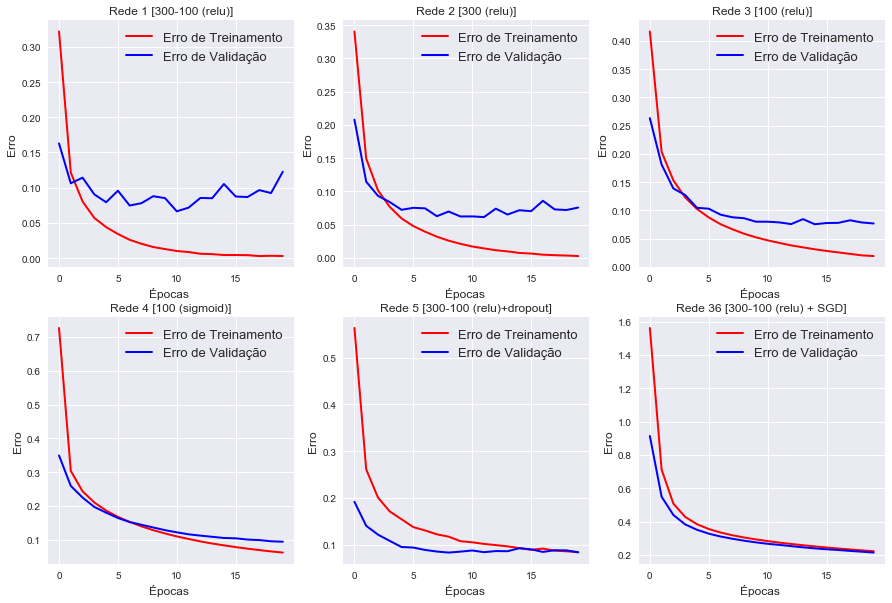

In [113]:
#Plot the Loss Curves
plt.figure(figsize=[15,10])

# Rede 1
plt.subplot(231)
plt.plot(hst_1.history['loss'],'r',linewidth=2.0)
plt.plot(hst_1.history['val_loss'],'b',linewidth=2.0)
plt.legend(['Erro de Treinamento', 'Erro de Validação'],fontsize=13)
plt.xlabel('Épocas ',fontsize=12)
plt.ylabel('Erro',fontsize=12)
plt.title('Rede 1 [300-100 (relu)]',fontsize=12)
 
# Rede 2
plt.subplot(232)
plt.plot(hst_2.history['loss'],'r',linewidth=2.0)
plt.plot(hst_2.history['val_loss'],'b',linewidth=2.0)
plt.legend(['Erro de Treinamento', 'Erro de Validação'],fontsize=13)
plt.xlabel('Épocas ',fontsize=12)
plt.ylabel('Erro',fontsize=12)
plt.title('Rede 2 [300 (relu)]',fontsize=12)

# Rede 3
plt.subplot(233)
plt.plot(hst_3.history['loss'],'r',linewidth=2.0)
plt.plot(hst_3.history['val_loss'],'b',linewidth=2.0)
plt.legend(['Erro de Treinamento', 'Erro de Validação'],fontsize=13)
plt.xlabel('Épocas ',fontsize=12)
plt.ylabel('Erro',fontsize=12)
plt.title('Rede 3 [100 (relu)]',fontsize=12)

# Rede 4
plt.subplot(234)
plt.plot(hst_4.history['loss'],'r',linewidth=2.0)
plt.plot(hst_4.history['val_loss'],'b',linewidth=2.0)
plt.legend(['Erro de Treinamento', 'Erro de Validação'],fontsize=13)
plt.xlabel('Épocas ',fontsize=12)
plt.ylabel('Erro',fontsize=12)
plt.title('Rede 4 [100 (sigmoid)]',fontsize=12)

# Rede 5
plt.subplot(235)
plt.plot(hst_5.history['loss'],'r',linewidth=2.0)
plt.plot(hst_5.history['val_loss'],'b',linewidth=2.0)
plt.legend(['Erro de Treinamento', 'Erro de Validação'],fontsize=13)
plt.xlabel('Épocas ',fontsize=12)
plt.ylabel('Erro',fontsize=12)
plt.title('Rede 5 [300-100 (relu)+dropout]',fontsize=12)

# Rede 6
plt.subplot(236)
plt.plot(hst_6.history['loss'],'r',linewidth=2.0)
plt.plot(hst_6.history['val_loss'],'b',linewidth=2.0)
plt.legend(['Erro de Treinamento', 'Erro de Validação'],fontsize=13)
plt.xlabel('Épocas ',fontsize=12)
plt.ylabel('Erro',fontsize=12)
plt.title('Rede 36 [300-100 (relu) + SGD]',fontsize=12)

plt.show()



### 5.2.2 Matriz de confusão

Para calcular a matriz de confusão foi utilizado o dataset de test e a predição obtida por cada Rede (modelo). O resultado segue abaixo:


In [119]:
# Predizendo o resultado para cada uma das redes

pred_1 = model_1.predict_classes(xin_test)
pred_2 = model_2.predict_classes(xin_test)
pred_3 = model_3.predict_classes(xin_test)
pred_4 = model_4.predict_classes(xin_test)
pred_5 = model_5.predict_classes(xin_test)
pred_6 = model_6.predict_classes(xin_test)

# Obtendo as matrizes de confusão
cm_1 = metrics.confusion_matrix(y_test, pred_1)
cm_2 = metrics.confusion_matrix(y_test, pred_2)
cm_3 = metrics.confusion_matrix(y_test, pred_3)
cm_4 = metrics.confusion_matrix(y_test, pred_4)
cm_5 = metrics.confusion_matrix(y_test, pred_5)
cm_6 = metrics.confusion_matrix(y_test, pred_6)


Apenas para efeito de checagem, a matriz de confusão para o primeiro caso (Rede 1) é apresentada a partir de seu conteúdo a seguir:

In [120]:
print(cm_1)

[[ 974    0    0    1    0    0    0    1    4    0]
 [   0 1115    2    2    0    0    1    1   14    0]
 [   3    1 1001    8    1    0    0   10    7    1]
 [   0    0    2  998    0    0    0    4    2    4]
 [   2    0    7    1  947    0    2    4    1   18]
 [   2    1    0   21    1  853    3    1    8    2]
 [   7    3    2    1    4    7  928    1    5    0]
 [   0    0    7    2    1    0    0 1012    2    4]
 [   3    0    1    5    1    2    0    4  954    4]
 [   1    3    0    5    3    2    0    2    3  990]]


Seguem os gráficos representando todas as matrizes de confusão:

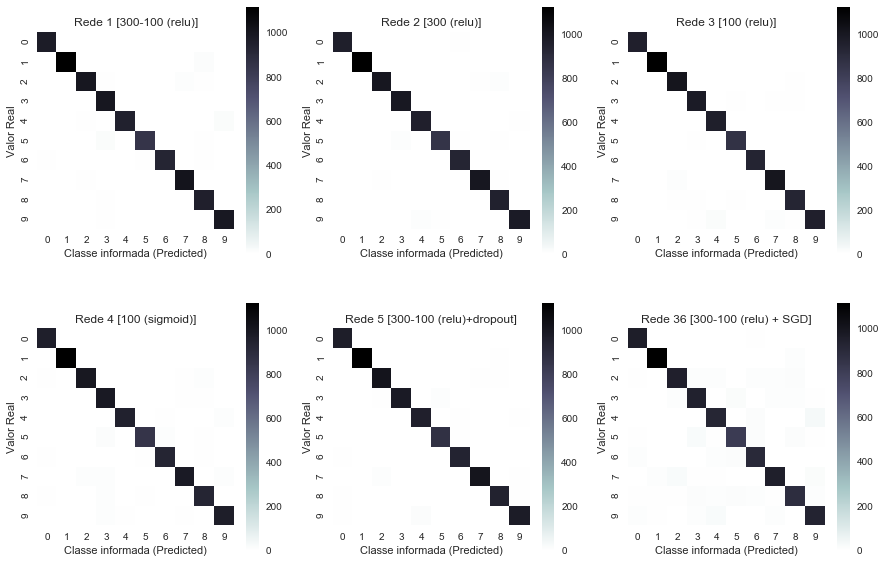

In [127]:
plt.figure(figsize=[15,10])

# Rede 1
plt.subplot(231)
ax = sns.heatmap(cm_1, cmap="bone_r")
ax.set_aspect(1)
plt.title('Rede 1 [300-100 (relu)]',fontsize=12)
plt.ylabel("Valor Real")
plt.xlabel("Classe informada (Predicted)")

# Rede 2
plt.subplot(232)
ax = sns.heatmap(cm_2, cmap="bone_r")
ax.set_aspect(1)
plt.title('Rede 2 [300 (relu)]',fontsize=12)
plt.ylabel("Valor Real")
plt.xlabel("Classe informada (Predicted)")

# Rede 3
plt.subplot(233)
ax = sns.heatmap(cm_3, cmap="bone_r")
ax.set_aspect(1)
plt.title('Rede 3 [100 (relu)]',fontsize=12)
plt.ylabel("Valor Real")
plt.xlabel("Classe informada (Predicted)")

# Rede 4
plt.subplot(234)
ax = sns.heatmap(cm_4, cmap="bone_r")
ax.set_aspect(1)
plt.title('Rede 4 [100 (sigmoid)]',fontsize=12)
plt.ylabel("Valor Real")
plt.xlabel("Classe informada (Predicted)")

# Rede 5
plt.subplot(235)
ax = sns.heatmap(cm_5, cmap="bone_r")
ax.set_aspect(1)
plt.title('Rede 5 [300-100 (relu)+dropout]',fontsize=12)
plt.ylabel("Valor Real")
plt.xlabel("Classe informada (Predicted)")

# Rede 6
plt.subplot(236)
ax = sns.heatmap(cm_6, cmap="bone_r")
ax.set_aspect(1)
plt.title('Rede 36 [300-100 (relu) + SGD]',fontsize=12)
plt.ylabel("Valor Real")
plt.xlabel("Classe informada (Predicted)")

plt.show()



Observa-se visualmente que apenas a última rede paresenta uma falsa decisão mais marcante, ou seja, uma probablidade de erro maior ao prever o valor real 4 confundindo-o com o dígito 9.

A tabela de confusão com os valores específicos é apresentada abaixo:


In [128]:
print(cm_6)

[[ 965    0    1    2    0    3    5    2    2    0]
 [   0 1113    3    2    0    1    4    1   11    0]
 [   8    4  954   13   12    1   12   10   15    3]
 [   1    1   12  947    0   18    2   11   12    6]
 [   1    1    3    0  923    1   14    2    4   33]
 [   7    2    0   22    7  815   14    3   15    7]
 [  13    3    3    0   12   14  908    3    2    0]
 [   3    9   22    5    6    1    0  959    3   20]
 [   8    6    6   16    9   15   12    8  885    9]
 [  11    7    1    9   25    4    1   11    3  937]]
